<a href="https://colab.research.google.com/github/mohammedhemed77/DL-Course-UDL-Book-Based-/blob/main/Implementations/Notebooks/GradientDescentTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent Optimizers
#### in this notebook we implement different types of optimizers using pytorch

#### By : Eng - Mohammed Hemed


### Optimization Algorithm 1: Mini Batch SGD

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

#### STEP 1: LOADING DATASET


In [2]:
# Set seed
torch.manual_seed(0)
train_dataset = dsets.MNIST(root='./data',train=True,
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 94.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 39.5MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 43.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.08MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### STEP 2: MAKING DATASET ITERABLE

In [5]:
batch_size = 100
num_epochs = 20
# Create DataLoader for training data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
# Create DataLoader for test data
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#### STEP 3: CREATE MODEL CLASS

In [6]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

#### STEP 4: INSTANTIATE MODEL CLASS

In [7]:
input_dim = 28*28
hidden_dim = 100      # hyperparameter
output_dim = 10

model_1 = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#### STEP 5: INSTANTIATE LOSS CLASS

In [8]:
criterion = nn.CrossEntropyLoss()

#### STEP 6: INSTANTIATE OPTIMIZER CLASS

In [9]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)

#### STEP 7: TRAIN THE MODEL


In [10]:
loss_values_1 = []        # to trace loss values
accuracy_values_1 = []    # to trace acuuracy values
iterations_1 = []         # to trace num of iterations

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as input Variable
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_1(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        # Store loss & accuracy every 500 iterations
        if iter % 500 == 0:
            correct = 0
            total = 0

            # Evaluate accuracy on test set
            for images, labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_()
                outputs = model_1(images)
                _, predicted = torch.max(outputs.data, 1)
                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Store values
            loss_values_1.append(loss.item())
            accuracy_values_1.append(accuracy.item())
            iterations_1.append(iter)

            # Print results
            print(f"Iteration: {iter}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")


Iteration: 500, Loss: 0.3460, Accuracy: 91.50%
Iteration: 1000, Loss: 0.2145, Accuracy: 92.47%
Iteration: 1500, Loss: 0.1920, Accuracy: 93.87%
Iteration: 2000, Loss: 0.1715, Accuracy: 94.47%
Iteration: 2500, Loss: 0.1125, Accuracy: 95.17%
Iteration: 3000, Loss: 0.1737, Accuracy: 95.60%
Iteration: 3500, Loss: 0.1011, Accuracy: 96.13%
Iteration: 4000, Loss: 0.1216, Accuracy: 96.41%
Iteration: 4500, Loss: 0.1218, Accuracy: 96.56%
Iteration: 5000, Loss: 0.1795, Accuracy: 96.89%
Iteration: 5500, Loss: 0.2862, Accuracy: 96.88%
Iteration: 6000, Loss: 0.0690, Accuracy: 97.10%
Iteration: 6500, Loss: 0.0366, Accuracy: 97.27%
Iteration: 7000, Loss: 0.1032, Accuracy: 97.32%
Iteration: 7500, Loss: 0.0853, Accuracy: 97.44%
Iteration: 8000, Loss: 0.0293, Accuracy: 97.37%
Iteration: 8500, Loss: 0.0668, Accuracy: 97.52%
Iteration: 9000, Loss: 0.0738, Accuracy: 97.45%
Iteration: 9500, Loss: 0.0284, Accuracy: 97.47%
Iteration: 10000, Loss: 0.0313, Accuracy: 97.50%
Iteration: 10500, Loss: 0.0300, Accuracy

### Optimization Algorithm 2: SGD Momentum


#### Start from here
#### STEP 4: INSTANTIATE MODEL CLASS again

In [11]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model_2 = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

#STEP 6: INSTANTIATE OPTIMIZER CLASS
learning_rate = 0.1
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate, momentum=0.9)

#### STEP 7: TRAIN THE MODEL

In [12]:
loss_values_2 = []        # to trace loss values
accuracy_values_2 = []    # to trace acuuracy values
iterations_2 = []         # to trace num of iterations

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as input Variable
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_2(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        # Store loss & accuracy every 500 iterations
        if iter % 500 == 0:
            correct = 0
            total = 0

            # Evaluate accuracy on test set
            for images, labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_()
                outputs = model_2(images)
                _, predicted = torch.max(outputs.data, 1)
                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Store values
            loss_values_2.append(loss.item())
            accuracy_values_2.append(accuracy.item())
            iterations_2.append(iter)

            # Print results
            print(f"Iteration: {iter}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

Iteration: 500, Loss: 0.2096, Accuracy: 95.45%
Iteration: 1000, Loss: 0.0786, Accuracy: 96.24%
Iteration: 1500, Loss: 0.0584, Accuracy: 97.12%
Iteration: 2000, Loss: 0.0592, Accuracy: 97.30%
Iteration: 2500, Loss: 0.0378, Accuracy: 97.34%
Iteration: 3000, Loss: 0.1035, Accuracy: 97.21%
Iteration: 3500, Loss: 0.0130, Accuracy: 97.38%
Iteration: 4000, Loss: 0.0795, Accuracy: 97.68%
Iteration: 4500, Loss: 0.0127, Accuracy: 97.70%
Iteration: 5000, Loss: 0.0112, Accuracy: 97.81%
Iteration: 5500, Loss: 0.0054, Accuracy: 97.70%
Iteration: 6000, Loss: 0.0172, Accuracy: 97.61%
Iteration: 6500, Loss: 0.0029, Accuracy: 97.66%
Iteration: 7000, Loss: 0.0555, Accuracy: 97.53%
Iteration: 7500, Loss: 0.0098, Accuracy: 97.82%
Iteration: 8000, Loss: 0.0012, Accuracy: 98.06%
Iteration: 8500, Loss: 0.0007, Accuracy: 97.90%
Iteration: 9000, Loss: 0.0011, Accuracy: 97.98%
Iteration: 9500, Loss: 0.0007, Accuracy: 97.82%
Iteration: 10000, Loss: 0.0009, Accuracy: 98.00%
Iteration: 10500, Loss: 0.0022, Accuracy

### Optimization Algorithm 4: Adam

#### STEP 4: INSTANTIATE MODEL CLASS

In [13]:

input_dim = 28*28
hidden_dim = 100
output_dim = 10

model_3 = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
print(model_3)
# STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

# STEP 6: INSTANTIATE OPTIMIZER CLASS
# learning_rate = 0.001
optimizer = torch.optim.Adam(model_3.parameters())

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


#### STEP 7: TRAIN THE MODEL


In [14]:
loss_values_3 = []        # to trace loss values
accuracy_values_3 = []    # to trace acuuracy values
iterations_3 = []         # to trace num of iterations

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as input Variable
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_2(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        # Store loss & accuracy every 500 iterations
        if iter % 500 == 0:
            correct = 0
            total = 0

            # Evaluate accuracy on test set
            for images, labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_()
                outputs = model_2(images)
                _, predicted = torch.max(outputs.data, 1)
                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Store values
            loss_values_3.append(loss.item())
            accuracy_values_3.append(accuracy.item())
            iterations_3.append(iter)

            # Print results
            print(f"Iteration: {iter}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

Iteration: 500, Loss: 0.0007, Accuracy: 98.11%
Iteration: 1000, Loss: 0.0019, Accuracy: 98.11%
Iteration: 1500, Loss: 0.0007, Accuracy: 98.11%
Iteration: 2000, Loss: 0.0010, Accuracy: 98.11%
Iteration: 2500, Loss: 0.0014, Accuracy: 98.11%
Iteration: 3000, Loss: 0.0004, Accuracy: 98.11%
Iteration: 3500, Loss: 0.0009, Accuracy: 98.11%
Iteration: 4000, Loss: 0.0004, Accuracy: 98.11%
Iteration: 4500, Loss: 0.0011, Accuracy: 98.11%
Iteration: 5000, Loss: 0.0041, Accuracy: 98.11%
Iteration: 5500, Loss: 0.0001, Accuracy: 98.11%
Iteration: 6000, Loss: 0.0011, Accuracy: 98.11%
Iteration: 6500, Loss: 0.0005, Accuracy: 98.11%
Iteration: 7000, Loss: 0.0009, Accuracy: 98.11%
Iteration: 7500, Loss: 0.0004, Accuracy: 98.11%
Iteration: 8000, Loss: 0.0007, Accuracy: 98.11%
Iteration: 8500, Loss: 0.0015, Accuracy: 98.11%
Iteration: 9000, Loss: 0.0004, Accuracy: 98.11%
Iteration: 9500, Loss: 0.0003, Accuracy: 98.11%
Iteration: 10000, Loss: 0.0004, Accuracy: 98.11%
Iteration: 10500, Loss: 0.0009, Accuracy

#### Plot Loss vs Iterations


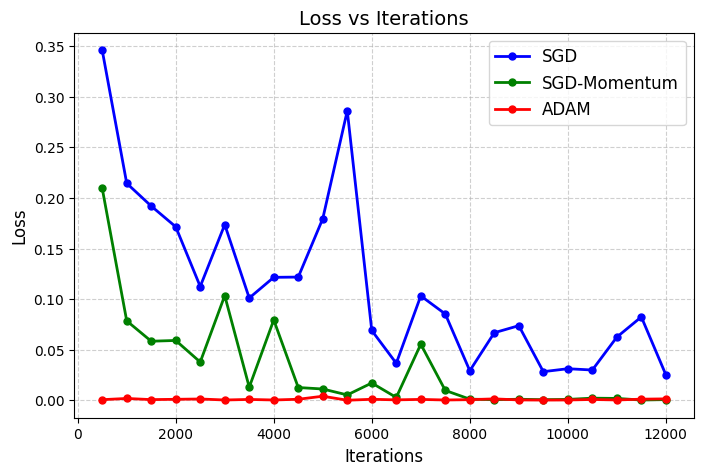

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(iterations_1, loss_values_1, label="SGD", color="blue", linestyle="-", marker="o", markersize=5, linewidth=2)
plt.plot(iterations_2, loss_values_2, label="SGD-Momentum", color="green", linestyle="-", marker="o", markersize=5, linewidth=2)
plt.plot(iterations_3, loss_values_3, label="ADAM", color="red", linestyle="-", marker="o", markersize=5, linewidth=2)

plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Loss vs Iterations", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

#### Plot Accuracy vs Iterations

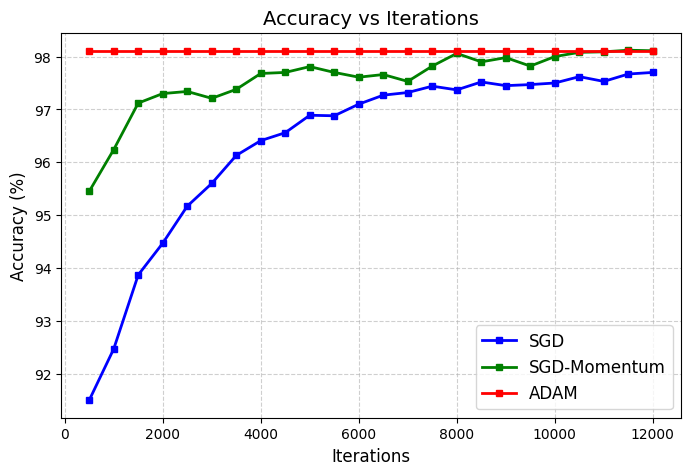

In [19]:

plt.figure(figsize=(8, 5))
plt.plot(iterations_1, accuracy_values_1, label="SGD", color="blue", linestyle="-", marker="s", markersize=5, linewidth=2)
plt.plot(iterations_2, accuracy_values_2, label="SGD-Momentum", color="green", linestyle="-", marker="s", markersize=5, linewidth=2)
plt.plot(iterations_3, accuracy_values_3, label="ADAM", color="red", linestyle="-", marker="s", markersize=5, linewidth=2)

plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Accuracy vs Iterations", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Sources :

https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/optimizers/#optimization-algorithm-3-mini-batch-gradient-descent


optimization for deep learning : (very good and short videos)
https://www.youtube.com/watch?v=M2xkmc2oHUc&list=PLuhqtP7jdD8DKUBtucBD0mGS7y0rT9alz&index=10

great article on optimizers :
https://towardsdatascience.com/understanding-deep-learning-optimizers-momentum-adagrad-rmsprop-adam-e311e377e9c2/

Exponential Wighted moving Average
https://towardsdatascience.com/intuitive-explanation-of-exponential-moving-average-2eb9693ea4dc/


More details Dr hatem Elattar : numerical optimization (playlist)  
https://www.youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN
